In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
import matplotlib
%matplotlib inline

In [4]:
matplotlib.rcParams["figure.figsize"]= (20,10)

In [5]:
df1 = pd.read_csv("C:/Users/aryas/Downloads/Mumbai_House_Prices.csv")
df1.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [6]:
df1.shape


(76038, 9)

In [7]:
df1.groupby('type')['type'].agg('count')

type
Apartment            74854
Independent House       73
Penthouse                3
Studio Apartment       882
Villa                  226
Name: type, dtype: int64

In [8]:
df2 = df1.drop(['status','age'],axis= 'columns')
df2.head()

,bhk,type,locality,area,price,price_unit,region
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East


#data cleaning

In [9]:
df2.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
dtype: int64

In [10]:

# Create a conversion factor based on 'price_unit'
df2['conversion'] = df2['price_unit'].apply(lambda x: 100 if x == 'Cr' else 1)

# Convert 'price' to lacs
df2['price_in_lacs'] = df2['price'] * df2['conversion']

df2.head()



,bhk,type,locality,area,price,price_unit,region,conversion,price_in_lacs
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,100,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,1,52.51
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,100,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,1,59.98
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,1,94.11


In [11]:
df2.head()

,bhk,type,locality,area,price,price_unit,region,conversion,price_in_lacs
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,100,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,1,52.51
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,100,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,1,59.98
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,1,94.11


In [12]:
df3= df2.drop(['price','price_unit','conversion'],axis='columns')

In [13]:
df3.head()

,bhk,type,locality,area,region,price_in_lacs
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,52.51
2,2,Apartment,Romell Serene,610,Borivali West,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,59.98
4,2,Apartment,Origin Oriana,659,Mira Road East,94.11


In [14]:
df3['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7], dtype=int64)

In [15]:
df3['area'].unique()

array([ 685,  640,  610, ..., 1974, 1634, 3049], dtype=int64)

In [16]:
df3[df3.area>1634]

,bhk,type,locality,area,region,price_in_lacs
6,5,Villa,Agami Estancia,2921,Boisar,199.0
32,4,Apartment,Ravechi Shreeji Divine,1874,Kharghar,270.0
55,5,Villa,Agami Estancia,2921,Boisar,199.0
127,3,Villa,Agami Estancia,2187,Boisar,149.0
128,3,Villa,Agami Estancia,2187,Boisar,149.0
...,...,...,...,...,...,...
75881,5,Apartment,Indiabulls Sky Forest,9000,Lower Parel,3000.0
75982,4,Apartment,Kalpataru Parkcity,1686,Thane West,360.0
76034,5,Apartment,Parinee Liva Roca,3049,Juhu,1200.0
76035,4,Apartment,Lodha Seaview,3313,Napeansea Road,1000.0


In [17]:
df3['area'].dtype

dtype('int64')

In [18]:
df4= df3.copy()

In [19]:
df4['price_per_squareft'] = df4['price_in_lacs']*100000/df4['area']

In [20]:
df4.head()

,bhk,type,locality,area,region,price_in_lacs,price_per_squareft
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,250.00,36496.350365
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,52.51,8204.687500
2,2,Apartment,Romell Serene,610,Borivali West,173.00,28360.655738
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,59.98,6847.031963
4,2,Apartment,Origin Oriana,659,Mira Road East,94.11,14280.728376


In [21]:
25000000/685


36496.3503649635

In [22]:
len(df4['locality'].unique())

9782

In [23]:
locality_status = df4.groupby('locality')['locality'].agg('count').sort_values(ascending= False)
locality_status

locality
Hiranandani Meadows           861
Sheth Avalon                  516
T Bhimjyani The Verraton      499
ACME Ozone Phase 2            467
Runwal Gardens                389
                             ... 
Reliable Bhairav Residency      1
Relation Vinayak Pride          1
Rekhi Sai Camellia              1
Rekhi Deffodils                 1
Zoeb Aayesha Palace             1
Name: locality, Length: 9782, dtype: int64

In [24]:
len(locality_status[locality_status<=5])

7204

In [25]:
len(locality_status[locality_status<=10])

8287

In [26]:
locality_status_lessthan10 = (locality_status[locality_status<=10])

In [27]:
df4['locality']= df4['locality'].apply(lambda x : 'other' if x in locality_status_lessthan10 else x)

In [28]:
len(locality_status[locality_status<=10])

8287

In [29]:
len(df4['locality'].unique())

1496

In [30]:
df4.head(20)

,bhk,type,locality,area,region,price_in_lacs,price_per_squareft
0,3,Apartment,other,685,Andheri West,250.00,36496.350365
1,2,Apartment,other,640,Naigaon East,52.51,8204.687500
2,2,Apartment,Romell Serene,610,Borivali West,173.00,28360.655738
3,2,Apartment,other,876,Panvel,59.98,6847.031963
4,2,Apartment,Origin Oriana,659,Mira Road East,94.11,14280.728376
5,2,Apartment,other,826,Parel,330.00,39951.573850
6,5,Villa,other,2921,Boisar,199.00,6812.735365
7,3,Apartment,Sanghvi Infenia,778,Santacruz East,289.00,37146.529563
8,1,Apartment,other,396,Badlapur East,29.84,7535.353535
9,2,Apartment,other,671,Fort,272.00,40536.512668


In [31]:
df4['bhkarea']= df4['area']/df4['bhk']

In [32]:
df4.head(20)

,bhk,type,locality,area,region,price_in_lacs,price_per_squareft,bhkarea
0,3,Apartment,other,685,Andheri West,250.00,36496.350365,228.333333
1,2,Apartment,other,640,Naigaon East,52.51,8204.687500,320.000000
2,2,Apartment,Romell Serene,610,Borivali West,173.00,28360.655738,305.000000
3,2,Apartment,other,876,Panvel,59.98,6847.031963,438.000000
4,2,Apartment,Origin Oriana,659,Mira Road East,94.11,14280.728376,329.500000
5,2,Apartment,other,826,Parel,330.00,39951.573850,413.000000
6,5,Villa,other,2921,Boisar,199.00,6812.735365,584.200000
7,3,Apartment,Sanghvi Infenia,778,Santacruz East,289.00,37146.529563,259.333333
8,1,Apartment,other,396,Badlapur East,29.84,7535.353535,396.000000
9,2,Apartment,other,671,Fort,272.00,40536.512668,335.500000


In [33]:
df4[df4.bhkarea<100].head()

,bhk,type,locality,area,region,price_in_lacs,price_per_squareft,bhkarea


In [34]:
df4[df4.bhkarea>600].head()


,bhk,type,locality,area,region,price_in_lacs,price_per_squareft,bhkarea
39,1,Independent House,other,701,Palghar,30.99,4420.827389,701.0
59,1,Apartment,other,635,Badlapur West,20.95,3299.212598,635.0
87,1,Independent House,other,701,Palghar,30.99,4420.827389,701.0
89,1,Apartment,Siddhivinayak Siddhivinayak Gaurav,695,Taloja,31.80,4575.539568,695.0
96,1,Apartment,Tulip Empire,750,Ulwe,57.00,7600.000000,750.0


no outliers present


In [35]:
df4.bhkarea.describe()

count    76038.000000
mean       513.278131
std        161.417111
min        127.000000
25%        403.500000
50%        502.500000
75%        600.000000
max       4930.000000
Name: bhkarea, dtype: float64

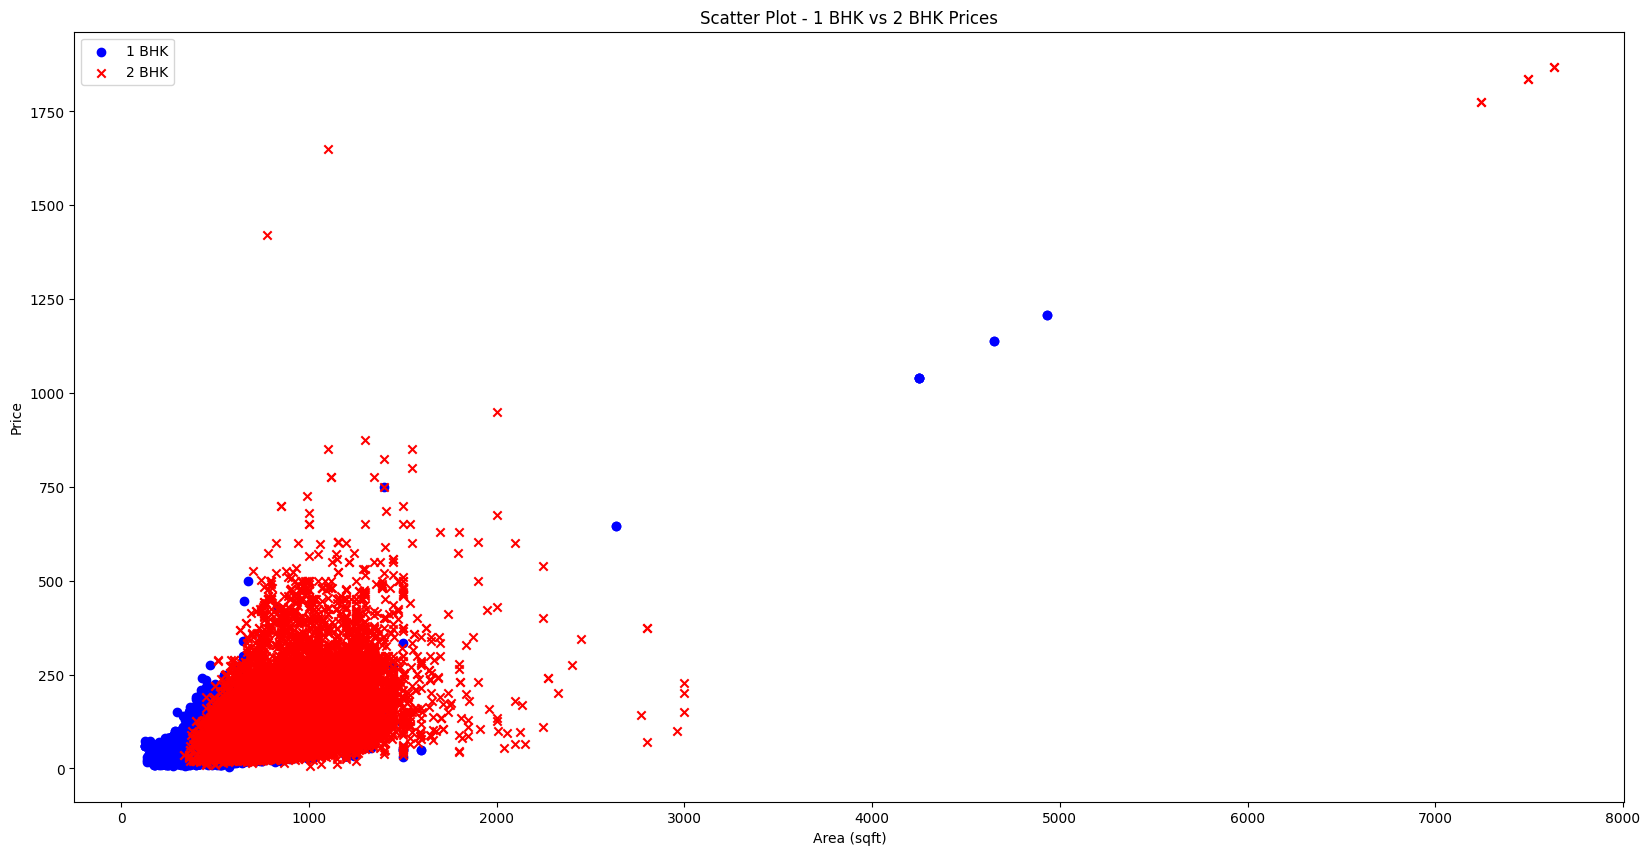

In [36]:

# Separate data for 1 BHK and 2 BHK
df4_1bhk = df4[df4['bhk'] == 1]
df4_2bhk = df4[df4['bhk'] == 2]

# Scatter plot for 1 BHK
plt.scatter(df4_1bhk['area'], df4_1bhk['price_in_lacs'], label='1 BHK', color='blue', marker='o')

# Scatter plot for 2 BHK
plt.scatter(df4_2bhk['area'], df4_2bhk['price_in_lacs'], label='2 BHK', color='red', marker='x')

# Set labels and title
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Scatter Plot - 1 BHK vs 2 BHK Prices')

# Display legend
plt.legend()

# Show the plot
plt.show()



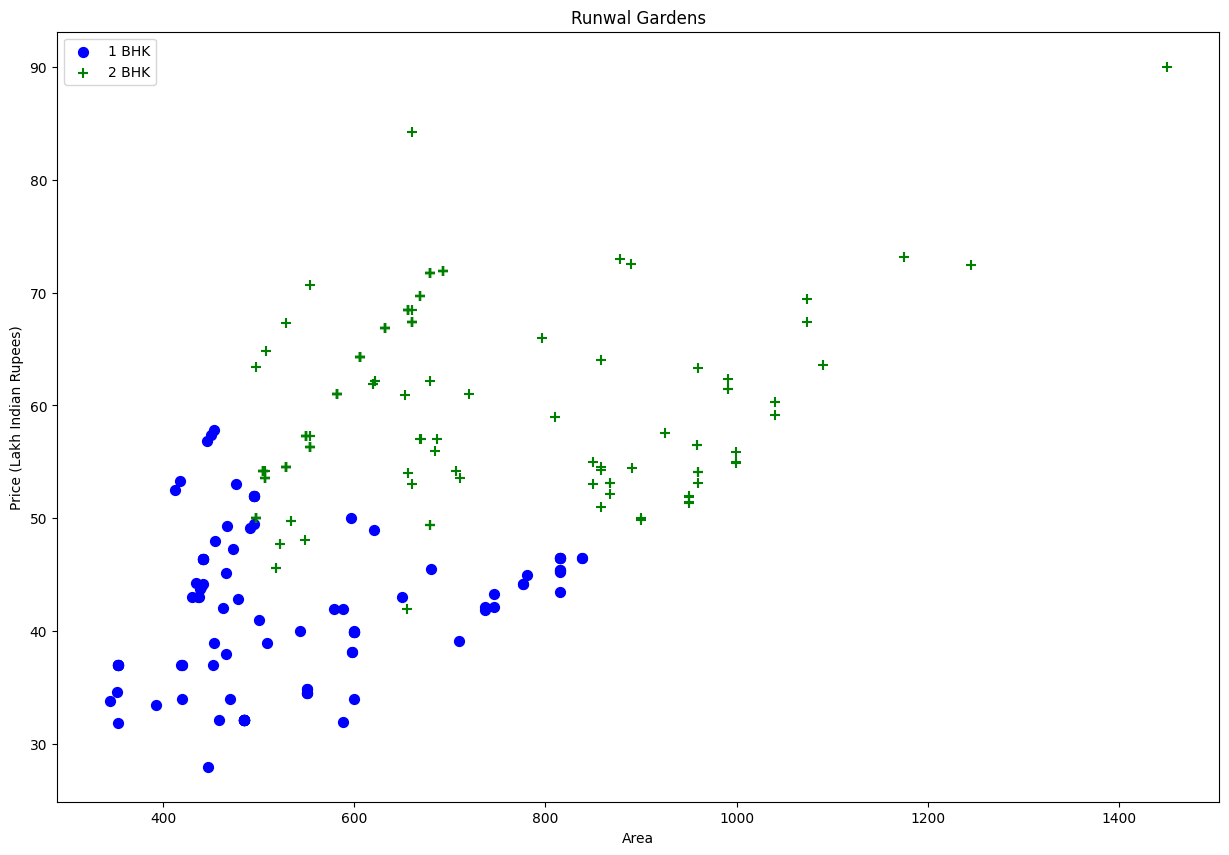

In [37]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter_chart(df, locality):
    bhk1 = df[(df.locality == locality) & (df.bhk == 1)]
    bhk2 = df[(df.locality == locality) & (df.bhk == 2)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk1.area, bhk1.price_in_lacs, color='blue', label='1 BHK', s=50)
    plt.scatter(bhk2.area, bhk2.price_in_lacs, marker='+', color='green', label='2 BHK', s=50)
    plt.xlabel("Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    plt.show()

# Assuming df4 is your DataFrame
plot_scatter_chart(df4, "Runwal Gardens")


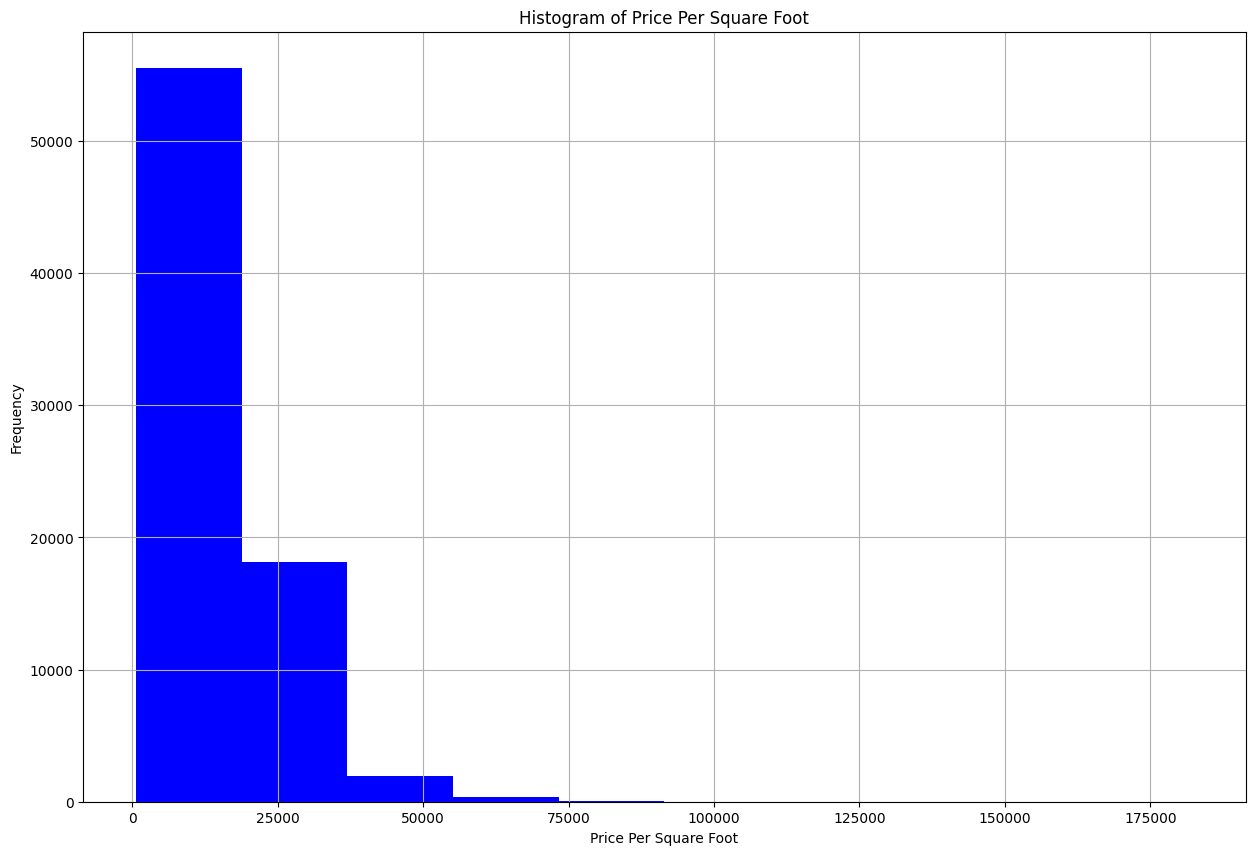

In [38]:

# Assuming df4 is your DataFrame and "price_per_squareft" is a column in it
price_per_squareft_data = df4['price_per_squareft']

# Plotting the histogram
plt.hist(price_per_squareft_data, bins=10, color='blue', alpha=1)
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price Per Square Foot')
plt.grid(True)
plt.show()


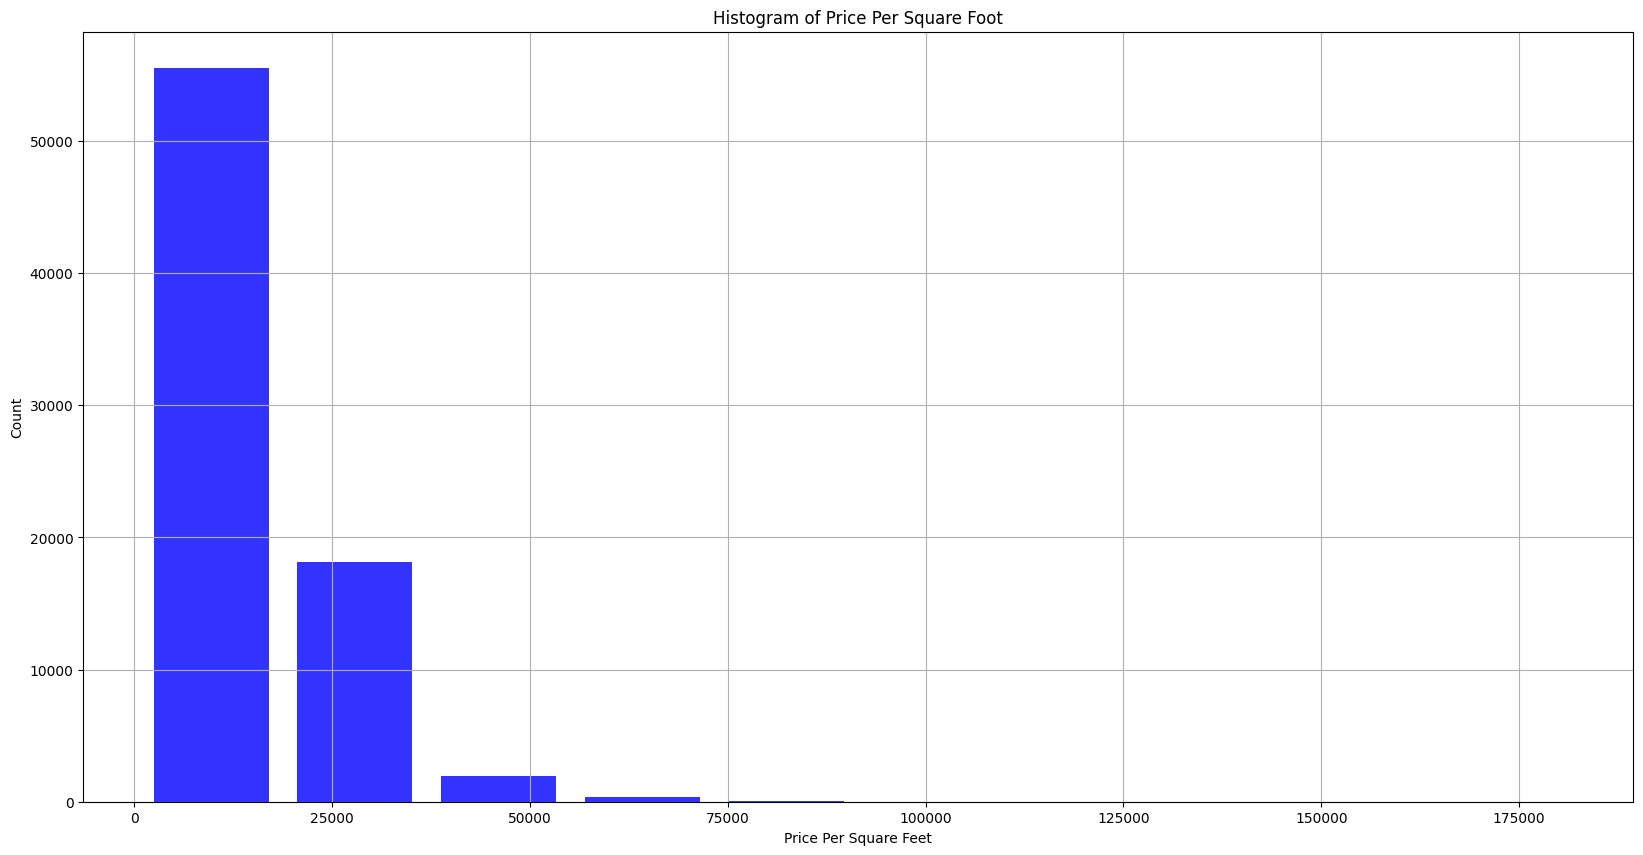

In [39]:
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = (20, 10)

plt.hist(df4.price_per_squareft, rwidth=0.8, color='blue', alpha=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.title("Histogram of Price Per Square Foot")
plt.grid(True)
plt.show()


In [40]:
df4.head()

,bhk,type,locality,area,region,price_in_lacs,price_per_squareft,bhkarea
0,3,Apartment,other,685,Andheri West,250.00,36496.350365,228.333333
1,2,Apartment,other,640,Naigaon East,52.51,8204.687500,320.000000
2,2,Apartment,Romell Serene,610,Borivali West,173.00,28360.655738,305.000000
3,2,Apartment,other,876,Panvel,59.98,6847.031963,438.000000
4,2,Apartment,Origin Oriana,659,Mira Road East,94.11,14280.728376,329.500000


In [41]:
df5 = df4.drop(['type', 'bhkarea','bhk','price_per_squareft','region'], axis='columns')


In [42]:
df5.head()

,locality,area,price_in_lacs
0,other,685,250.00
1,other,640,52.51
2,Romell Serene,610,173.00
3,other,876,59.98
4,Origin Oriana,659,94.11


In [43]:
dummies = pd.get_dummies(df5.locality)


In [44]:
df6 = pd.concat([df5, dummies], axis = 'columns')
df6.head()

,locality,area,price_in_lacs,Estate Cardinal,Mayflower,Radhe Krishna Heights,Samriddhi,365 Days Majestic Planet,5P Bhagwati Heritage,A And O A And O Excellente,...,White Berry Residency,White Heaven Shree Shaswat Building No 15,Windsor Grande Residences,Y K and Sons Yashwant Avenue,Yash Dahisar Shivangan,Yash Dahisar Shivangan Wing A,Yogi Ajmera Bliss,Yogsiddhi Sumukh Hills,Zire The Kollage,other
0,other,685,250.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,other,640,52.51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Romell Serene,610,173.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,other,876,59.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Origin Oriana,659,94.11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df7= df6.drop(['locality'], axis = 'columns')
df7.head()

,area,price_in_lacs,Estate Cardinal,Mayflower,Radhe Krishna Heights,Samriddhi,365 Days Majestic Planet,5P Bhagwati Heritage,A And O A And O Excellente,A And O Eminente,...,White Berry Residency,White Heaven Shree Shaswat Building No 15,Windsor Grande Residences,Y K and Sons Yashwant Avenue,Yash Dahisar Shivangan,Yash Dahisar Shivangan Wing A,Yogi Ajmera Bliss,Yogsiddhi Sumukh Hills,Zire The Kollage,other
0,685,250.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,640,52.51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,610,173.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,876,59.98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,659,94.11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df7.columns = df7.columns.str.strip()


In [47]:

df8= df7.drop(['Estate Cardinal'], axis = 'columns')
df8.head()

,area,price_in_lacs,Mayflower,Radhe Krishna Heights,Samriddhi,365 Days Majestic Planet,5P Bhagwati Heritage,A And O A And O Excellente,A And O Eminente,A And O F Residences,...,White Berry Residency,White Heaven Shree Shaswat Building No 15,Windsor Grande Residences,Y K and Sons Yashwant Avenue,Yash Dahisar Shivangan,Yash Dahisar Shivangan Wing A,Yogi Ajmera Bliss,Yogsiddhi Sumukh Hills,Zire The Kollage,other
0,685,250.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,640,52.51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,610,173.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,876,59.98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,659,94.11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X= df8.drop('price_in_lacs', axis = 'columns')
X.head()

,area,Mayflower,Radhe Krishna Heights,Samriddhi,365 Days Majestic Planet,5P Bhagwati Heritage,A And O A And O Excellente,A And O Eminente,A And O F Residences,A H A H Sapphire,...,White Berry Residency,White Heaven Shree Shaswat Building No 15,Windsor Grande Residences,Y K and Sons Yashwant Avenue,Yash Dahisar Shivangan,Yash Dahisar Shivangan Wing A,Yogi Ajmera Bliss,Yogsiddhi Sumukh Hills,Zire The Kollage,other
0,685,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,610,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,876,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,659,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Y = df8.price_in_lacs

In [50]:
Y.head(10)

0    250.00
1     52.51
2    173.00
3     59.98
4     94.11
5    330.00
6    199.00
7    289.00
8     29.84
9    272.00
Name: price_in_lacs, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [52]:
import sklearn 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)


0.7341056145489167

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.71601841, 0.7096461 , 0.70423105, 0.75196837, 0.73544639])

In [54]:
X.columns

Index(['area', 'Mayflower', 'Radhe Krishna Heights', 'Samriddhi',
       '365 Days Majestic Planet', '5P Bhagwati Heritage',
       'A And O A And O Excellente', 'A And O Eminente',
       'A And O F Residences', 'A H A H Sapphire',
       ...
       'White Berry Residency', 'White Heaven Shree Shaswat Building No 15',
       'Windsor Grande Residences', 'Y K and Sons Yashwant Avenue',
       'Yash Dahisar Shivangan', 'Yash Dahisar Shivangan Wing A',
       'Yogi Ajmera Bliss', 'Yogsiddhi Sumukh Hills', 'Zire The Kollage',
       'other'],
      dtype='object', length=1496)

In [55]:
def predict_price(locality,area,bhk):    
    loc_index = np.where(X.columns==locality)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [60]:
predict_price('Yash Dahisar Shivangan',300, 1)

C:\Users\aryas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


145.80018960292955

In [62]:
predict_price('Mayflower',1000, 2)

C:\Users\aryas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


128.97167278305983

In [64]:
predict_price('Mayflower',1000, 2)

C:\Users\aryas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


128.97167278305983

In [67]:
predict_price('Raymond Raymond Realty TenX Habitat',800,2)

C:\Users\aryas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


470.24378235426184

In [69]:
predict_price('Raymond Raymond Realty TenX Habitat',600,2)

C:\Users\aryas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


418.6908387055918